# Titanic Survival Prediction Using Logistic Regression

In [1]:
# Download dataset
!gdown --id 1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OFgBOb4B1j32uK26vf5urkp8rqVmD_Wf
To: /content/titanic.zip
100% 7.00k/7.00k [00:00<00:00, 16.3MB/s]


In [2]:
# Extract file titanic.zip
!unzip -q titanic.zip

In [3]:
# Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Read data using pandas libaries
DATA_PATH = 'titanic_modified_dataset.csv'
df = pd.read_csv(DATA_PATH, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [6]:
df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
Title,0
Survived,0


In [7]:
# Convert dataframe to array and split to X, y
data = df.to_numpy().astype('float64')
X_data = data[:, :-1]
y_data = data[:, -1]

print(X_data.shape)
print(y_data.shape)

(891, 8)
(891,)


In [8]:
# Add bias
X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]

print(X_data)

[[ 1.      3.      0.     ...  7.25    0.      0.    ]
 [ 1.      1.      1.     ... 71.2833  1.      1.    ]
 [ 1.      3.      1.     ...  7.925   0.      2.    ]
 ...
 [ 1.      3.      1.     ... 23.45    0.      2.    ]
 [ 1.      1.      0.     ... 30.      1.      0.    ]
 [ 1.      3.      0.     ...  7.75    2.      0.    ]]


In [9]:
# Split data to train, val, test with ratio 7:2:1
X_train, X_val,y_train, y_val = train_test_split(X_data,
                                                 y_data,
                                                 test_size=0.2,
                                                 random_state=2,
                                                 shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.125,
                                                  random_state=2,
                                                  shuffle=True)

In [10]:
print(f'Number of training sample: {X_train.shape[0]}')
print(f'Number of validation sample: {X_val.shape[0]}')
print(f'Number of test sample: {X_test.shape[0]}')

Number of training sample: 623
Number of validation sample: 179
Number of test sample: 89


In [11]:
# Normalizer data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:,1:])
X_val[:, 1:] = normalizer.transform(X_val[:,1:])
X_test[:, 1:] = normalizer.transform(X_test[:,1:])

In [12]:
X_train

array([[ 1.        ,  0.8380325 , -0.73366996, ..., -0.34812766,
         0.89679528, -0.55130115],
       [ 1.        , -1.55141486, -0.73366996, ...,  1.76556546,
        -0.60106922, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.47988477,
        -0.60106922, -0.55130115],
       ...,
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.48238806,
         2.39465977, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.22655193,
        -0.60106922, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, ..., -0.05432564,
         2.39465977,  1.3289577 ]])

In [34]:
def sigmoid_function(z):
  return 1/ (1 + np.exp(-z))

def predict(X, thetas):
  return sigmoid_function(np.dot(X, thetas))

def loss_function(y_pred, y):
  y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
  loss = (-y*np.log(y_pred) - (1 - y)*np.log(1 - y_pred)).mean()
  return loss

def compute_gradient(X, y, y_pred):
  print(X)
  print(y)
  print(y_pred)
  return np.dot(X.T, (y_pred - y))/y.size

def compute_accuracy(X, y, thetas):
  y_pred = predict(X, thetas).round()
  acc = (y_pred == y).mean()
  return acc




In [18]:
learning_rate = 0.01
batch_size = 16
epochs = 100
np.random.seed(2)
thetas = np.random.uniform(size=X_train.shape[1])

loss_train = []
loss_val = []
acc_train = []
acc_val = []



for epoch in range(epochs):
  loss_train_batch = []
  loss_val_batch = []
  acc_train_batch = []
  acc_val_batch = []

  for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]

    y_pred = predict(X_batch, thetas)

    batch_loss_train = loss_function(y_pred, y_batch)
    loss_train_batch.append(batch_loss_train)

    gradient = compute_gradient(X_batch, y_batch, y_pred)

    thetas = thetas - learning_rate * gradient

    batch_acc_train = compute_accuracy(X_train, y_train, thetas)
    acc_train_batch.append(batch_acc_train)

    y_pred_val = predict(X_val, thetas)

    batch_loss_val = loss_function(y_pred_val, y_val)
    loss_val_batch.append(batch_loss_val)

    batch_acc_val = compute_accuracy(X_val, y_val, thetas)
    acc_val_batch.append(batch_acc_val)


  train_loss_batch = sum(loss_train_batch)/ len(loss_train_batch)
  val_loss_batch = sum(loss_val_batch)/ len(loss_val_batch)
  train_acc_batch = sum(acc_train_batch)/ len(acc_train_batch)
  val_acc_batch = sum(acc_val_batch)/ len(acc_val_batch)


  loss_train.append(train_loss_batch)
  loss_val.append(val_loss_batch)
  acc_train.append(train_acc_batch)
  acc_val.append(val_acc_batch)

  print(f"EPOCH {epoch + 1}:\tTrading loss: {train_loss_batch:.3f}\t Validation loss: {val_loss_batch:.3f}")



EPOCH 1:	Trading loss: 0.703	 Validation loss: 0.599
EPOCH 2:	Trading loss: 0.670	 Validation loss: 0.582
EPOCH 3:	Trading loss: 0.640	 Validation loss: 0.567
EPOCH 4:	Trading loss: 0.614	 Validation loss: 0.555
EPOCH 5:	Trading loss: 0.592	 Validation loss: 0.544
EPOCH 6:	Trading loss: 0.572	 Validation loss: 0.535
EPOCH 7:	Trading loss: 0.554	 Validation loss: 0.528
EPOCH 8:	Trading loss: 0.539	 Validation loss: 0.522
EPOCH 9:	Trading loss: 0.526	 Validation loss: 0.517
EPOCH 10:	Trading loss: 0.514	 Validation loss: 0.513
EPOCH 11:	Trading loss: 0.504	 Validation loss: 0.509
EPOCH 12:	Trading loss: 0.495	 Validation loss: 0.507
EPOCH 13:	Trading loss: 0.487	 Validation loss: 0.505
EPOCH 14:	Trading loss: 0.480	 Validation loss: 0.503
EPOCH 15:	Trading loss: 0.474	 Validation loss: 0.502
EPOCH 16:	Trading loss: 0.468	 Validation loss: 0.501
EPOCH 17:	Trading loss: 0.463	 Validation loss: 0.500
EPOCH 18:	Trading loss: 0.459	 Validation loss: 0.500
EPOCH 19:	Trading loss: 0.455	 Valida

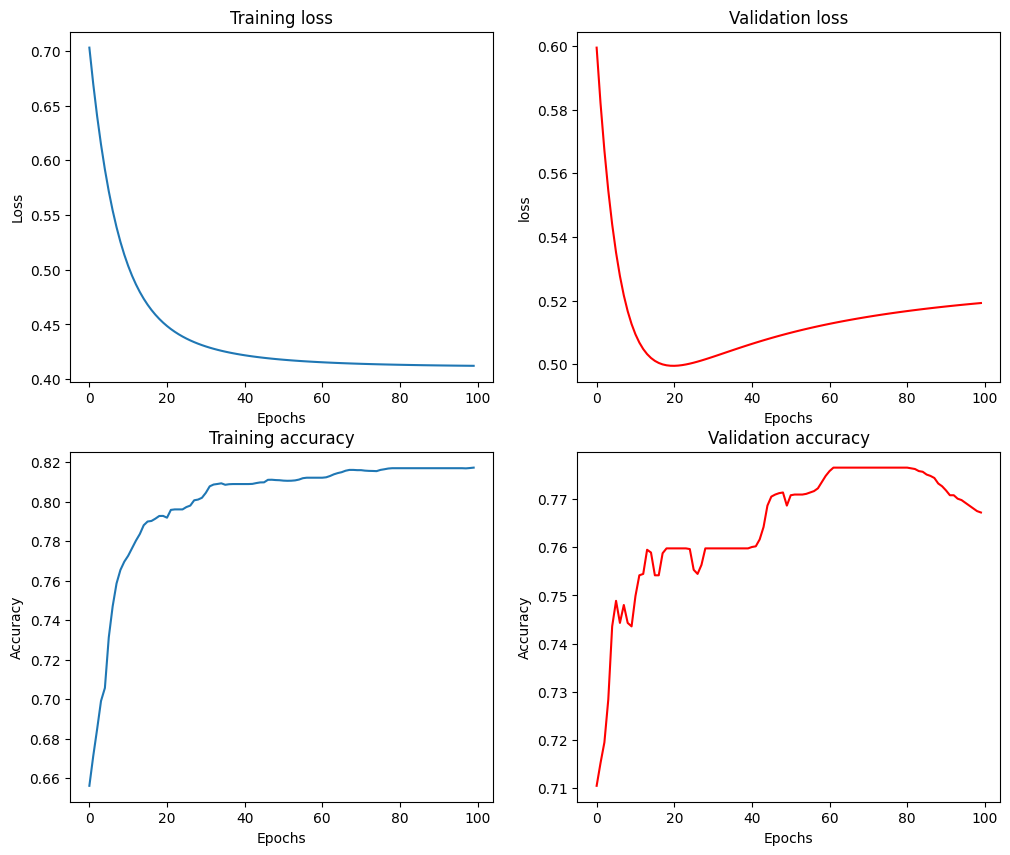

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(loss_train)
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training loss')

ax[0, 1].plot(loss_val, color='red')
ax[0,1].set(xlabel='Epochs', ylabel='loss')
ax[0, 1].set_title("Validation loss")

ax[1, 0].plot(acc_train)
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 0].set_title("Training accuracy")

ax[1, 1].plot(acc_val, color='red')
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 1].set_title("Validation accuracy")

plt.show()

In [20]:
# Evaltion model
val_set_acc = compute_accuracy(X_val, y_val, thetas)
test_set_acc = compute_accuracy(X_test, y_test, thetas)

print(f"Validation set accuracy: {val_set_acc}")
print(f"Test set accuracy: {test_set_acc}")

Validation set accuracy: 0.770949720670391
Test set accuracy: 0.7752808988764045


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train[:, 1:], y_train)

pred = model.predict(X_val[:, 1:])
print(f"Validation set accuracy: {accuracy_score(y_val, pred)}")

pred = model.predict(X_test[:, 1:])

print(f"Validation set accuracy: {accuracy_score(y_test, pred)}")



Validation set accuracy: 0.770949720670391
Validation set accuracy: 0.7865168539325843


# Twitter sentiment Analysis

In [ ]:
# download data
!gdown --id 1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1u_lWZPAVIdWG2gsi5myYhdtMoJ3MP0_j
To: /content/twitter_sentiment_analysis_2cls_dataset.zip
100% 471k/471k [00:00<00:00, 6.43MB/s]


In [ ]:
!unzip -q /content/twitter_sentiment_analysis_2cls_dataset.zip

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict



In [ ]:
# Read data
dataset_path = '/content/sentiment_analysis.csv'
df= pd.read_csv(dataset_path, index_col='id')

df


,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


In [ ]:
def text_normalizer(text):
  text = re.sub(r'^RT[\s]+', '', text)

  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

  text = re.sub(r'#','', text)

  text = re.sub(r'[^\w\s]', '', text)

  tokenizer = TweetTokenizer(
      preserve_case=False,
      strip_handles=True,
      reduce_len=True
  )

  text_tokens = tokenizer.tokenize(text)
  return text_tokens


In [ ]:
def get_freqs(df):
  freqs = defaultdict(lambda: 0)
  for i, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    tokens = text_normalizer(tweet)
    for word in tokens:
      pair = (word, label)
      freqs[pair] += 1

  return freqs

In [ ]:
def get_features(tweet, freqs):
  tokens = text_normalizer(tweet)
  X = np.zeros(3)
  X[0] = 1
  for token in tokens:
    X[1] += freqs[(token,0)]
    X[2] += freqs[(token,1)]

  return X


In [ ]:
X = []
y = []

freqs = get_freqs(df)
for i, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  x_i = get_features(tweet, freqs)
  X.append(x_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(7920, 3)
(7920,)


In [ ]:
# Chia train, val, test theo tỷ lệ 7:2:1
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

print(f'Number of training sample: {X_train.shape[0]}')
print(f'Number of validation sample: {X_val.shape[0]}')
print(f'Number of test sample: {X_test.shape[0]}')

Number of training sample: 5544
Number of validation sample: 1584
Number of test sample: 792


In [ ]:
# Normalizer data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])



In [ ]:
# important function
def sigmoid_function(z):
  return 1/ (1 + np.exp(-z))

def predict(X, theta):
  y_pred = np.dot(X, theta)
  return sigmoid_function(y_pred)

def compute_loss(y_pred, y):
  y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)

  # Binary cross-entropy
  loss = -y * np.log(y_pred) - (1 - y) * np.log(1-y_pred)
  return loss.mean()

def compute_gradient(X, y, y_pred):
  return np.dot(X.transpose(), (y_pred - y)) / y.size

def update_thetas(theta, gradient, lr):
  return theta - lr * gradient

def compute_accuracy(X, y, theta):
  y_pred = predict(X, theta).round()
  acc = (y_pred == y).mean()

  return acc

In [ ]:
lr = 0.01
batch_size = 128
epochs = 200
np.random.seed(2)
theta = np.random.uniform(size=X_train.shape[1])

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for _ in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        Xi = X_train[i:i+batch_size]
        yi = y_train[i:i+batch_size]

        y_hat = predict(Xi, theta)

        train_loss = compute_loss(y_hat, yi)

        gradient = compute_gradient(Xi, yi, y_hat)

        theta = update_thetas(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f"\nEPOCH {_ + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")


EPOCH 1:	Training loss: 0.707	Validation loss: 0.704

EPOCH 2:	Training loss: 0.661	Validation loss: 0.659

EPOCH 3:	Training loss: 0.624	Validation loss: 0.622

EPOCH 4:	Training loss: 0.594	Validation loss: 0.591

EPOCH 5:	Training loss: 0.569	Validation loss: 0.566

EPOCH 6:	Training loss: 0.548	Validation loss: 0.546

EPOCH 7:	Training loss: 0.531	Validation loss: 0.528

EPOCH 8:	Training loss: 0.516	Validation loss: 0.514

EPOCH 9:	Training loss: 0.504	Validation loss: 0.502

EPOCH 10:	Training loss: 0.494	Validation loss: 0.491

EPOCH 11:	Training loss: 0.485	Validation loss: 0.483

EPOCH 12:	Training loss: 0.477	Validation loss: 0.475

EPOCH 13:	Training loss: 0.471	Validation loss: 0.468

EPOCH 14:	Training loss: 0.465	Validation loss: 0.463

EPOCH 15:	Training loss: 0.460	Validation loss: 0.457

EPOCH 16:	Training loss: 0.456	Validation loss: 0.453

EPOCH 17:	Training loss: 0.452	Validation loss: 0.449

EPOCH 18:	Training loss: 0.448	Validation loss: 0.445

EPOCH 19:	Training

Text(0.5, 1.0, 'Validation accuracy')

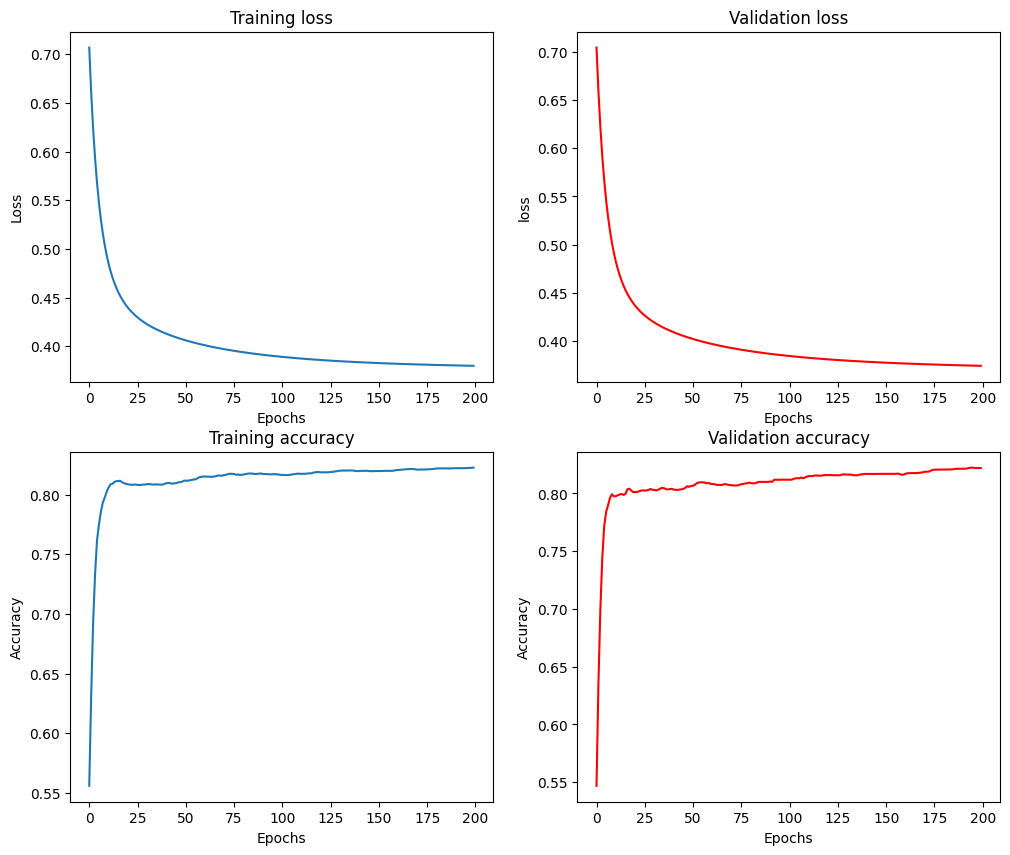

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training loss')

ax[0, 1].plot(val_losses, color='red')
ax[0,1].set(xlabel='Epochs', ylabel='loss')
ax[0, 1].set_title("Validation loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 0].set_title("Training accuracy")

ax[1, 1].plot(val_accs, color='red')
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 1].set_title("Validation accuracy")


In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print('Evalution on validatoin and test set:')
print(f'Accuracy on validation set: {val_set_acc}')
print(f'Accuracy on test set: {test_set_acc}')


Evalution on validatoin and test set:
Accuracy on validation set: 0.821969696969697
Accuracy on test set: 0.73989898989899


<ipython-input-34-aa27d548cf76>:3: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-z))
